In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df0 = df[:50]
df1 = df[51:100]
df2 = df[101:]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

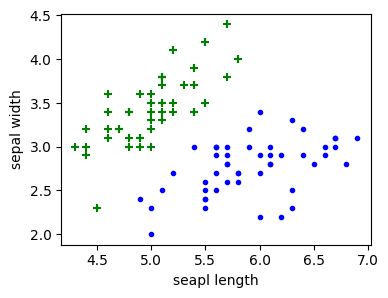

In [9]:
plt.figure(figsize=(4,3))
plt.xlabel('seapl length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue', marker='.')

In [10]:

from sklearn.model_selection import train_test_split

df['target'] = iris.target
df['flower_name'] = [iris.target_names[i] for i in iris.target]



X = df.drop(['target', 'flower_name'], axis='columns')  
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)



In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [12]:
len(X_train)


120

In [13]:
len(X_test)

30

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=10)

In [15]:

accuracy = knn.score(X_test, Y_test)
print("Model Accuracy:",accuracy)


Model Accuracy: 0.9666666666666667


In [16]:
knn.predict([[4.8, 30, 1.5, 0.3]])

c:\Users\SUBHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [17]:
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
confusion = confusion_matrix(Y_test,Y_pred)
confusion

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(8.222222222222223, 0.5, 'Actual')

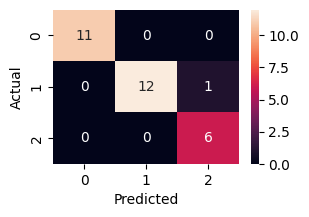

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(3,2)) 
sn.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')



In [19]:
from sklearn.metrics import classification_report

# Assuming Y_test and Y_pred are defined
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

